In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dadosOuro = pd.read_csv("ouro.csv")
dadosOuro.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,...,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,...,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,...,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,...,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,...,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,...,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
precoOuro = dadosOuro['Close'].values
x = [i for i in range(len(precoOuro))]
y = list(reversed(precoOuro))

In [ ]:
def mediasMoveis(serie):
  medias = []

  for i, v in enumerate(serie):
    if i == 0:
      m = v
      medias.append(m)
    else:
      m = m + (v - m) / (i + 2)
      medias.append(m)
  return medias

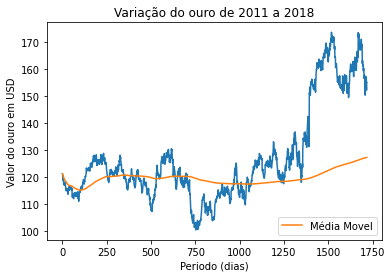

In [ ]:
plt.plot(x, y)
plt.plot(x, mediasMoveis(y), label = "Média Movel")
plt.xlabel('Periodo (dias)')
plt.ylabel('Valor do ouro em USD')
plt.title('Variação do ouro de 2011 a 2018')
plt.legend(loc='lower right')

In [ ]:
class Objeto:
  def __init__(self, estado = None):
    self.estado = estado

  def _repr_(self):
    return '{}'.format(getattr(self, '_name_', self._class_._name_))

In [ ]:
class Agente(Objeto):
  def __init__(self, estado = None, funcaoAgente = None):
    super().__init__(estado)
    self.funcaoAgente = funcaoAgente
    self.historicoPercepcoes = []

In [ ]:
def funcaoAgenteCompraOuro(media, valor):
  if(valor >= media):
    return False, valor, media
  else:
    return True, valor, media

In [ ]:
class AgenteCambio(Agente):
  def __init__(self, estadoInicial = None, funcaoAgente = None):
    super().__init__(estadoInicial, funcaoAgente)
    self.observacao = 0
    self.mediaAtual = 0
    self.medias = []

  def atualizaEstado(self, valor):
    self.observacao += 1
    if (self.observacao == 1):
      self.mediaAtual = valor
    else:
      self.mediaAtual = self.mediaAtual + (valor - self.mediaAtual) / (self.observacao + 1) 

    self.estado.append(valor)
    self.medias.append(self.mediaAtual)

  def percepcao(self, valorAtual):
    self.atualizaEstado(valorAtual)

  def saida(self):
    return self.funcaoAgente(self.medias[-1], self.estado[-1])

In [ ]:
ac = AgenteCambio([], funcaoAgenteCompraOuro)

In [ ]:
for i in y[:10]:
  ac.percepcao(i)
  print(ac.saida())

(False, 121.25, 121.25)
(True, 121.059998, 121.186666)
(True, 120.57, 121.0324995)
(True, 119.660004, 120.7580004)
(True, 120.019997, 120.63499983333334)
(True, 118.720001, 120.36142857142858)
(True, 119.239998, 120.22124975)
(True, 117.43, 119.91111088888889)
(True, 118.150002, 119.735)
(True, 117.870003, 119.56545481818182)


In [ ]:
class AgenteCambioDesempenho(AgenteCambio):
  def __init__(self, estadoInicial, funcaoAgente = None, saldoDolar = 0, saldoOuro = 0):
    super().__init__(estadoInicial, funcaoAgente)
    self.saldoDolar = saldoDolar
    self.saldoOuro = saldoOuro
    self.evolucaoDolar = []

  def comprar(self):
    if(self.saldoDolar > 0):
      self.saldoOuro += self.saldoDolar / self.estado[-1]
      self.saldoDolar = 0

  def vender(self):
    if(self.saldoOuro > 0):
      self.saldoDolar += self.saldoOuro * self.estado[-1]
      self.saldoOuro = 0
    self.evolucaoDolar.append(self.saldoDolar)

  def desempenho(self):
    return self.evolucaoDolar[-1] - self.evolucaoDolar[0]

In [ ]:
class Ambiente:
  def __init__(self, estadoInicial=None):
    self.estado = estadoInicial
    self.agentes = []

  def adicionarAgente(self, agente):
    self.agentes.append(agente)

In [ ]:
class AmbienteFinanceiro(Ambiente):
  def __init__(self, estadoInicial):
    super().__init__(estadoInicial)
  
  def executaAmbiente(self):
    for gst in self.estado:
      for ag in self.agentes:
        ag.atualizaEstado(gst)
        acaoComprar = ag.saida()
        if (acaoComprar[0] == True):
          ag.comprar()
        else:
          ag.vender()

  def desempenhoAgentes(self):
    desempenho = []
    for i, ag in  enumerate(self.agentes):
      desempenho.append((i, ag.desempenho()))
    return desempenho

In [ ]:
ag = AgenteCambioDesempenho([], funcaoAgenteCompraOuro, 1000, 0)

ambiente = AmbienteFinanceiro(y)
ambiente.adicionarAgente(ag)
ambiente.executaAmbiente()
desempenho = ambiente.desempenhoAgentes()

print("Desempenho: (Agente, Lucro)", desempenho)

Desempenho: (Agente, Lucro) [(0, 258.74554930665636)]


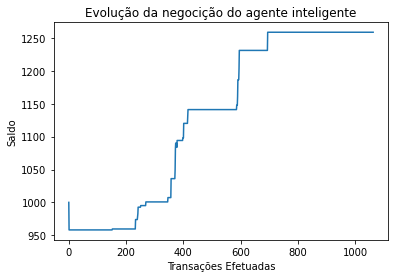

In [ ]:
#Evolução de desempenho
x2 = list(range(len(ag.evolucaoDolar)))
plt.plot(x2, ag.evolucaoDolar)
plt.xlabel("Transações Efetuadas")
plt.ylabel("Saldo")
plt.title("Evolução da negocição do agente inteligente")
plt.show()

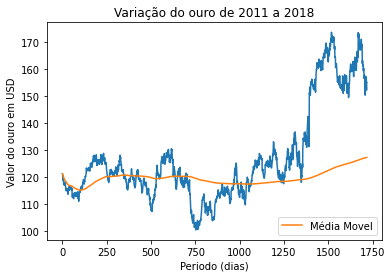

In [ ]:
plt.plot(x, y)
plt.plot(x, mediasMoveis(y), label = "Média Movel")
plt.xlabel('Periodo (dias)')
plt.ylabel('Valor do ouro em USD')
plt.title('Variação do ouro de 2011 a 2018')
plt.legend(loc='lower right')